# Taming Text

In [1]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import nltk
from os import path
from wordcloud import WordCloud # pip install wordcloud
from PIL import Image

%matplotlib inline

First and foremost lets just load the data:

In [2]:
folder = 'hillary-clinton-emails/'
aliases = pd.read_csv(folder + 'Aliases.csv', index_col='Id')
email_receivers = pd.read_csv(folder + 'EmailReceivers.csv', index_col='Id')
emails = pd.read_csv(folder + 'Emails.csv', index_col='Id')
persons = pd.read_csv(folder + 'Persons.csv', index_col='Id')

In [3]:
aliases.head()

,Alias,PersonId
Id,,
1,111th congress,1
2,agna usemb kabul afghanistan,2
3,ap,3
4,asuncion,4
5,alec,5


In [4]:
email_receivers.head()

,EmailId,PersonId
Id,,
1,1,80
2,2,80
3,3,228
4,3,80
5,4,80


In [5]:
emails.head()

,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
Id,,,,,,,,,,,,,,,,,,,,,
1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [6]:
emails.columns

Index(['DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [7]:
emailsList = emails['ExtractedBodyText'].tolist()
cleanedList = [str(x) for x in emailsList if str(x) != 'nan']

In [8]:
rawExtractedBody = ' '.join(cleanedList)

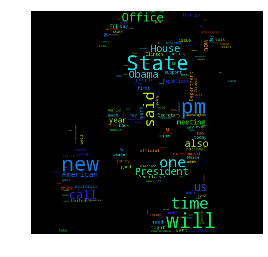

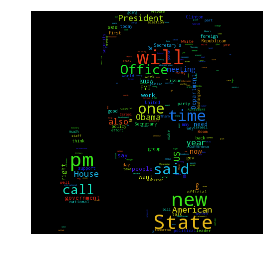

In [9]:
def generate_word_cloud(text):
    mask = np.array(Image.open("hillary_mask_1.jpg"))
    
    # Generate a word cloud image
    wordcloud = WordCloud(mask=mask).generate(text)
    
    # Display the generated image:
    plt.imshow(wordcloud)
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40, mask=mask).generate(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
generate_word_cloud(rawExtractedBody)

## Preprosessing

- Tokenizing
- Stemming
- Stop word removal

In [10]:
from nltk.tokenize import RegexpTokenizer

# Make a tokenizer that only the words (e.g. remove punctuation)
tokenizer = RegexpTokenizer(r'\w+')

In [11]:
tokens = pd.Series(tokenizer.tokenize(rawExtractedBody))
tokens.head(15)

0           B6
1     Thursday
2        March
3            3
4         2011
5            9
6           45
7           PM
8            H
9       Latest
10         How
11       Syria
12          is
13      aiding
14     Qaddafi
dtype: object

### Stemming

In [12]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

stemmed = tokens.apply(stemmer.stem)

In [13]:
stemmed.head(15)

0           b6
1     thursday
2        march
3            3
4         2011
5            9
6           45
7           pm
8            h
9       latest
10         how
11       syria
12          is
13         aid
14     qaddafi
dtype: object

### Stopword removal

In [14]:
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

no_stopwords = stemmed[stemmed.apply(lambda x: x not in stop)]

In [15]:
no_stopwords.head(15)

0           b6
1     thursday
2        march
3            3
4         2011
5            9
6           45
7           pm
8            h
9       latest
11       syria
13         aid
14     qaddafi
17         sid
18         hrc
dtype: object

In [16]:
no_stopwords.shape

(368718,)

In [17]:
print('Removing stopwords took away %.2f%% of the words' % (100*(1 - no_stopwords.shape[0] / stemmed.shape[0])))

Removing stopwords took away 41.13% of the words


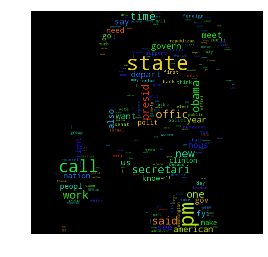

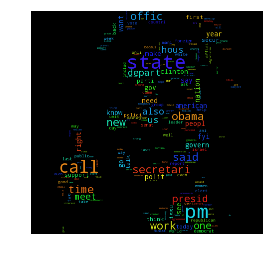

In [18]:
generate_word_cloud(no_stopwords.to_string(index=False, header=False))

## 2.


In [19]:
import pycountry # pip install pycountry
len(pycountry.countries)

249

In [20]:
pycountry.countries.lookup('PM')


Country(alpha_2='PM', alpha_3='SPM', name='Saint Pierre and Miquelon', numeric='666')

In [21]:
emailsList = emails['ExtractedBodyText'].astype(str)
tokenized = emailsList.apply(tokenizer.tokenize)

In [22]:
tokenized.head()

Id
1                                                [nan]
2    [B6, Thursday, March, 3, 2011, 9, 45, PM, H, L...
3                                                [Thx]
4                                                [nan]
5    [H, hrod17, clintonemail, com, Friday, March, ...
Name: ExtractedBodyText, dtype: object

In [23]:
stemmed = tokenized.apply(lambda x: [stemmer.stem(w) for w in x])

In [24]:
stemmed.head()

Id
1                                                [nan]
2    [b6, thursday, march, 3, 2011, 9, 45, pm, h, l...
3                                                [thx]
4                                                [nan]
5    [h, hrod17, clintonemail, com, friday, march, ...
Name: ExtractedBodyText, dtype: object

In [41]:
no_stopwords = tokenized.apply(lambda x: [w for w in x if (w not in stop) ])

In [42]:
no_stopwords.head()

Id
1                                                [nan]
2    [B6, Thursday, March, 3, 2011, 9, 45, PM, H, L...
3                                                [Thx]
4                                                [nan]
5    [H, hrod17, clintonemail, com, Friday, March, ...
Name: ExtractedBodyText, dtype: object

In [43]:
import operator

def lookup_country(email):
    countries = []
    for word in email:
        try:
            if word in ['pm', 'spm', '666', 'com', '174']:
                continue
            country_name = pycountry.countries.lookup(word).name
            countries.append(country_name)
        except:
            continue
    if countries:
        top_country = max(set(countries), key=countries.count)
    else:
        top_country = np.NaN
    return top_country

In [83]:
country = no_stopwords.apply(lookup_country)

In [84]:
country.value_counts()

Saint Pierre and Miquelon                       480
Armenia                                         259
Canada                                          175
India                                           167
United States                                   159
Italy                                           158
Réunion                                         135
Norway                                          131
Andorra                                          95
Dominican Republic                               66
Tonga                                            63
Somalia                                          57
Micronesia, Federated States of                  51
Iceland                                          51
China                                            44
Israel                                           43
American Samoa                                   41
United Arab Emirates                             38
Haiti                                            37
Afghanistan 

Problem with current approach:
    - Tokenization causes country names to become seperated -> 'United States' becomes 'United', 'States' and thus pycountry.countries.lookup fails for such cases
    - there are a lot of abbreviations as PM (prime minister ?) which are actual countries abbreviations (Saint Pierre and Miquelon) but we cannot simply get rid of all the abbreviations since USA or UK is widely used.

#### Todo on country extraction
- countrylist is full of crap
- Fix problems mentioned above

## Sentimental analyzis

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sent_analyzer = SentimentIntensityAnalyzer()
sentiments = no_stopwords.apply(lambda x: sent_analyzer.polarity_scores(' '.join(x)))

#### FYI: This takes a lot of time

In [81]:
def classify_sentiment(x):
    score = x['pos'] - x['neg']
    if score == 0:
        return 0
    elif score < 0:
        return -1
    else:
        return 1
    
scores = sentiments.apply(classify_sentiment)

In [82]:
scores.value_counts()

 0    45
 1    40
-1    15
Name: ExtractedBodyText, dtype: int64

### Todo on sentiment analysis:

- Make dataframe with countries and scores
- Aggregrate score over countries
- Plot histogram

## Assignment
1. Generate a word cloud based on the raw corpus -- I recommend you to use the [Python word_cloud library](https://github.com/amueller/word_cloud).
With the help of `nltk` (already available in your Anaconda environment), implement a standard text pre-processing 
pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and
cons (if any) of the two word clouds you generated.

2. Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?

3. Using the `models.ldamodel` module from the [gensim library](https://radimrehurek.com/gensim/index.html), run topic
modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which
returns topics that you consider to be meaningful at first sight.

4. *BONUS*: build the communication graph (unweighted and undirected) among the different email senders and recipients
using the `NetworkX` library. Find communities in this graph with `community.best_partition(G)` method from the 
[community detection module](http://perso.crans.org/aynaud/communities/index.html). Print the most frequent 20 words used
by the email authors of each community. Do these word lists look similar to what you've produced at step 3 with LDA?
Can you identify clear discussion topics for each community? Discuss briefly the obtained results.
